### Unsupervised Learning: Principal Component Analysis 

- Dataset: BaskinRobbins dataset
- Learning Date: 1-Sep-23
- Learning from: Prasert Kanawattanachai (CBS)
    - Github: https://github.com/prasertcbs/

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [20]:
df = pd.read_csv('https://github.com/prasertcbs/basic-dataset/raw/master/BaskinRobbinsCluster.csv')
df.sample(10)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
23,Fudge Brownie,180,12.0,0.3,18,13,3.0,0
40,Old Fashioned Butter Pecan,260,18.0,0.4,20,16,5.0,1
13,Chocolate Chip Cookie Dough,280,15.0,0.5,31,23,5.0,1
32,Mango Mania,130,6.0,0.2,17,14,2.0,0
31,Made with Snickers,170,9.0,0.3,21,16,3.0,0
47,Pistachio Almond,270,18.0,0.5,21,15,7.0,1
17,Citrus Twist Ice,100,0.0,0.0,25,18,0.0,2
26,Green Tea,140,9.0,0.3,13,10,3.0,0
15,Chocolate Hazelnut Truffle,280,17.0,0.4,29,20,5.0,1
53,Reese® NHL® Power Play,330,21.0,0.4,30,23,8.0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Flavour            70 non-null     object 
 1   Calories           70 non-null     int64  
 2   Total Fat (g)      70 non-null     float64
 3   Trans Fat (g)      70 non-null     float64
 4   Carbohydrates (g)  70 non-null     int64  
 5   Sugars (g)         70 non-null     int64  
 6   Protein (g)        70 non-null     float64
 7   cluster            70 non-null     int64  
dtypes: float64(3), int64(4), object(1)
memory usage: 4.5+ KB


In [22]:
df.columns

Index(['Flavour', 'Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)', 'cluster'],
      dtype='object')

In [23]:
cols = ['Calories', 'Total Fat (g)', 'Trans Fat (g)',
       'Carbohydrates (g)', 'Sugars (g)', 'Protein (g)']
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [24]:
len(cols)

6

array([[<AxesSubplot: title={'center': 'Calories'}>,
        <AxesSubplot: title={'center': 'Total Fat (g)'}>,
        <AxesSubplot: title={'center': 'Trans Fat (g)'}>,
        <AxesSubplot: title={'center': 'Carbohydrates (g)'}>,
        <AxesSubplot: title={'center': 'Sugars (g)'}>,
        <AxesSubplot: title={'center': 'Protein (g)'}>]], dtype=object)

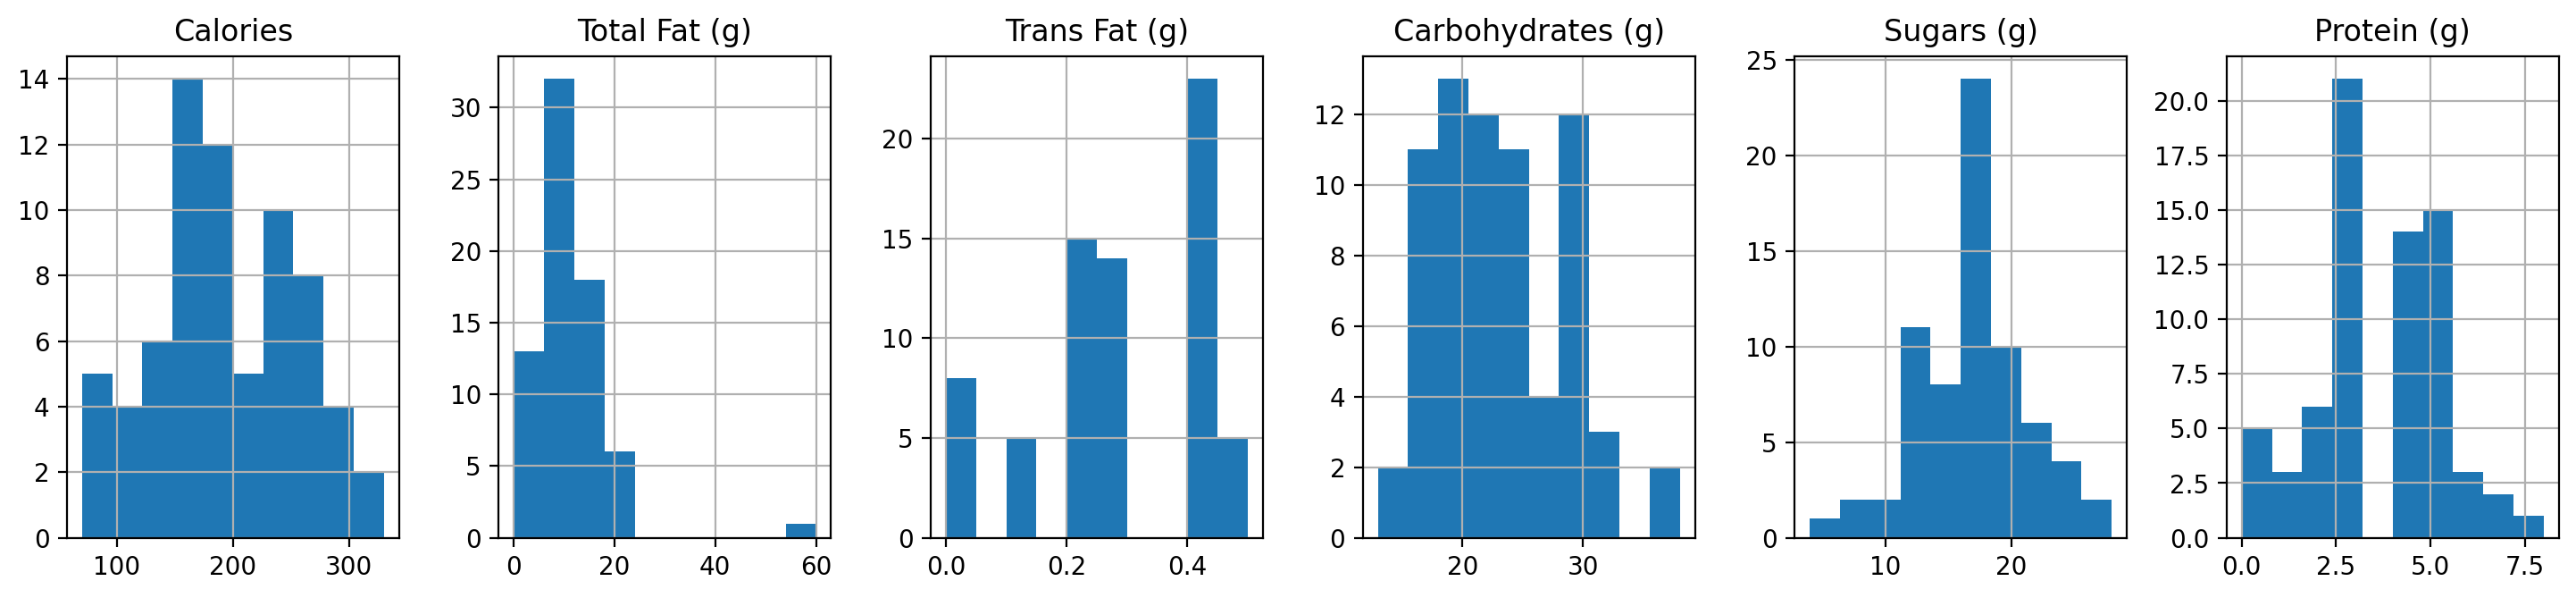

In [25]:
df[cols].hist(layout = (1, len(cols)), figsize = (3 * len(cols), 3.5))

In [26]:
dcorr = df[cols].corr()
dcorr

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
Calories,1.000000,0.712023,0.843900,0.602181,0.575605,0.822287
Total Fat (g),0.712023,1.000000,0.649645,0.244462,0.249821,0.595305
Trans Fat (g),0.843900,0.649645,1.000000,0.327513,0.406342,0.693241
Carbohydrates (g),0.602181,0.244462,0.327513,1.000000,0.635768,0.437426
Sugars (g),0.575605,0.249821,0.406342,0.635768,1.000000,0.285580
Protein (g),0.822287,0.595305,0.693241,0.437426,0.285580,1.000000


In [27]:
dcorr.shape

(6, 6)

In [28]:
mask = np.zeros_like(dcorr)
mask.shape

(6, 6)

In [29]:
mask

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [30]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 1.]])

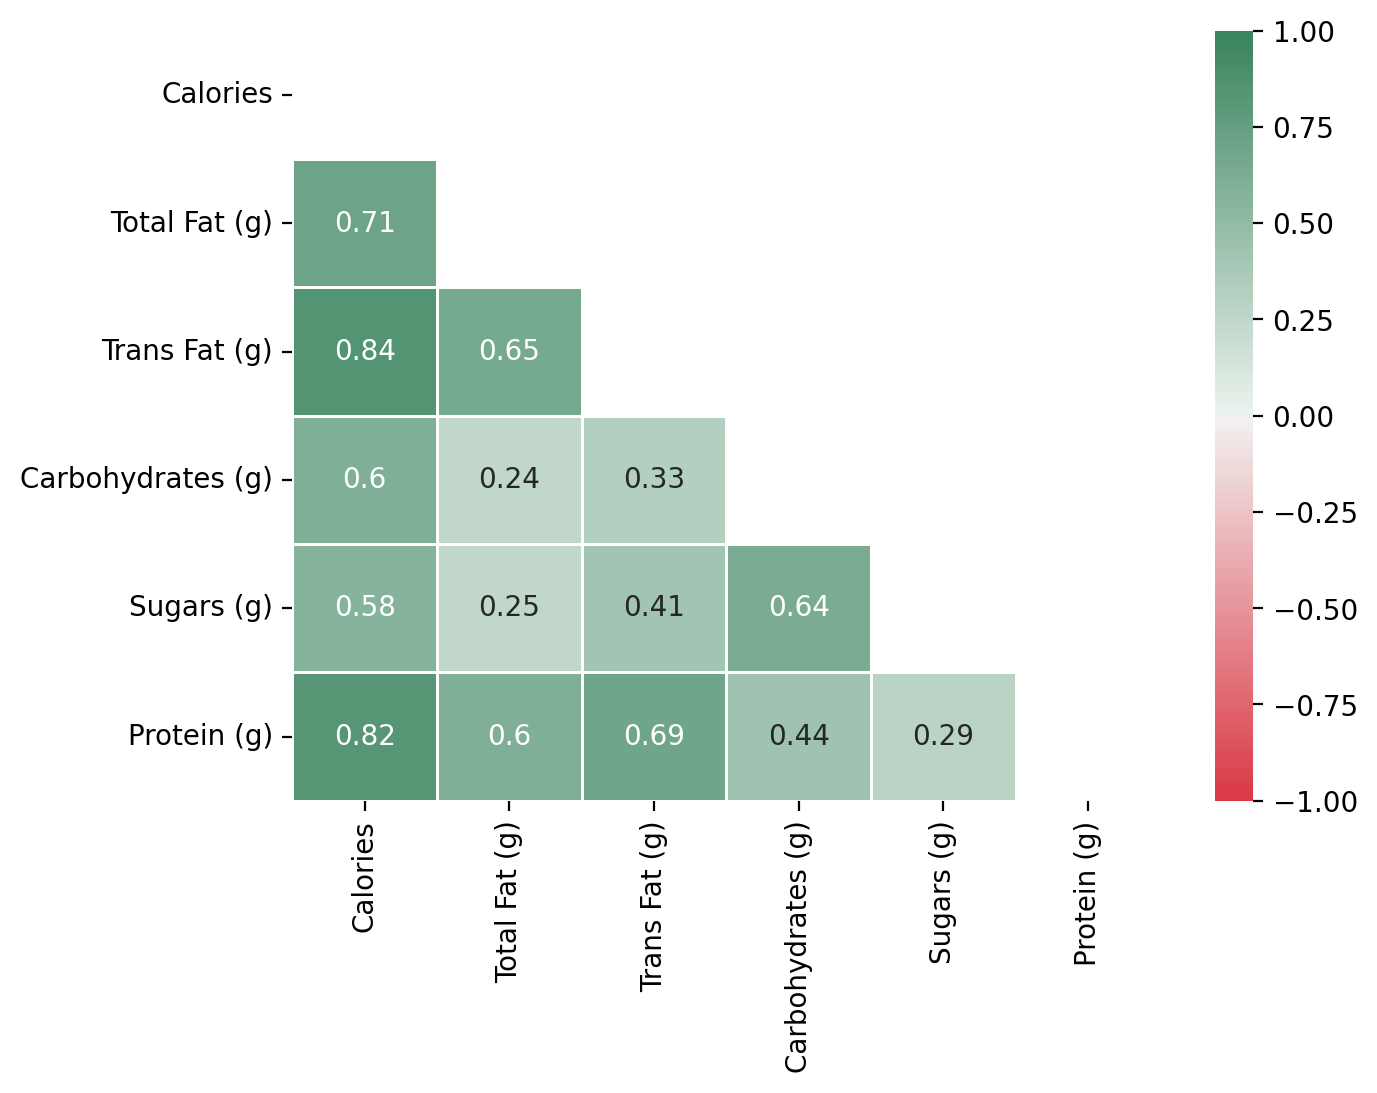

In [31]:
fig, ax = plt.subplots(figsize = (7,5))

sns.heatmap(dcorr, cmap = sns.diverging_palette(10, 145, n = 100), 
            vmin = -1, vmax = 1, center = 0, linewidths = 1, annot = True, mask = mask, ax = ax);

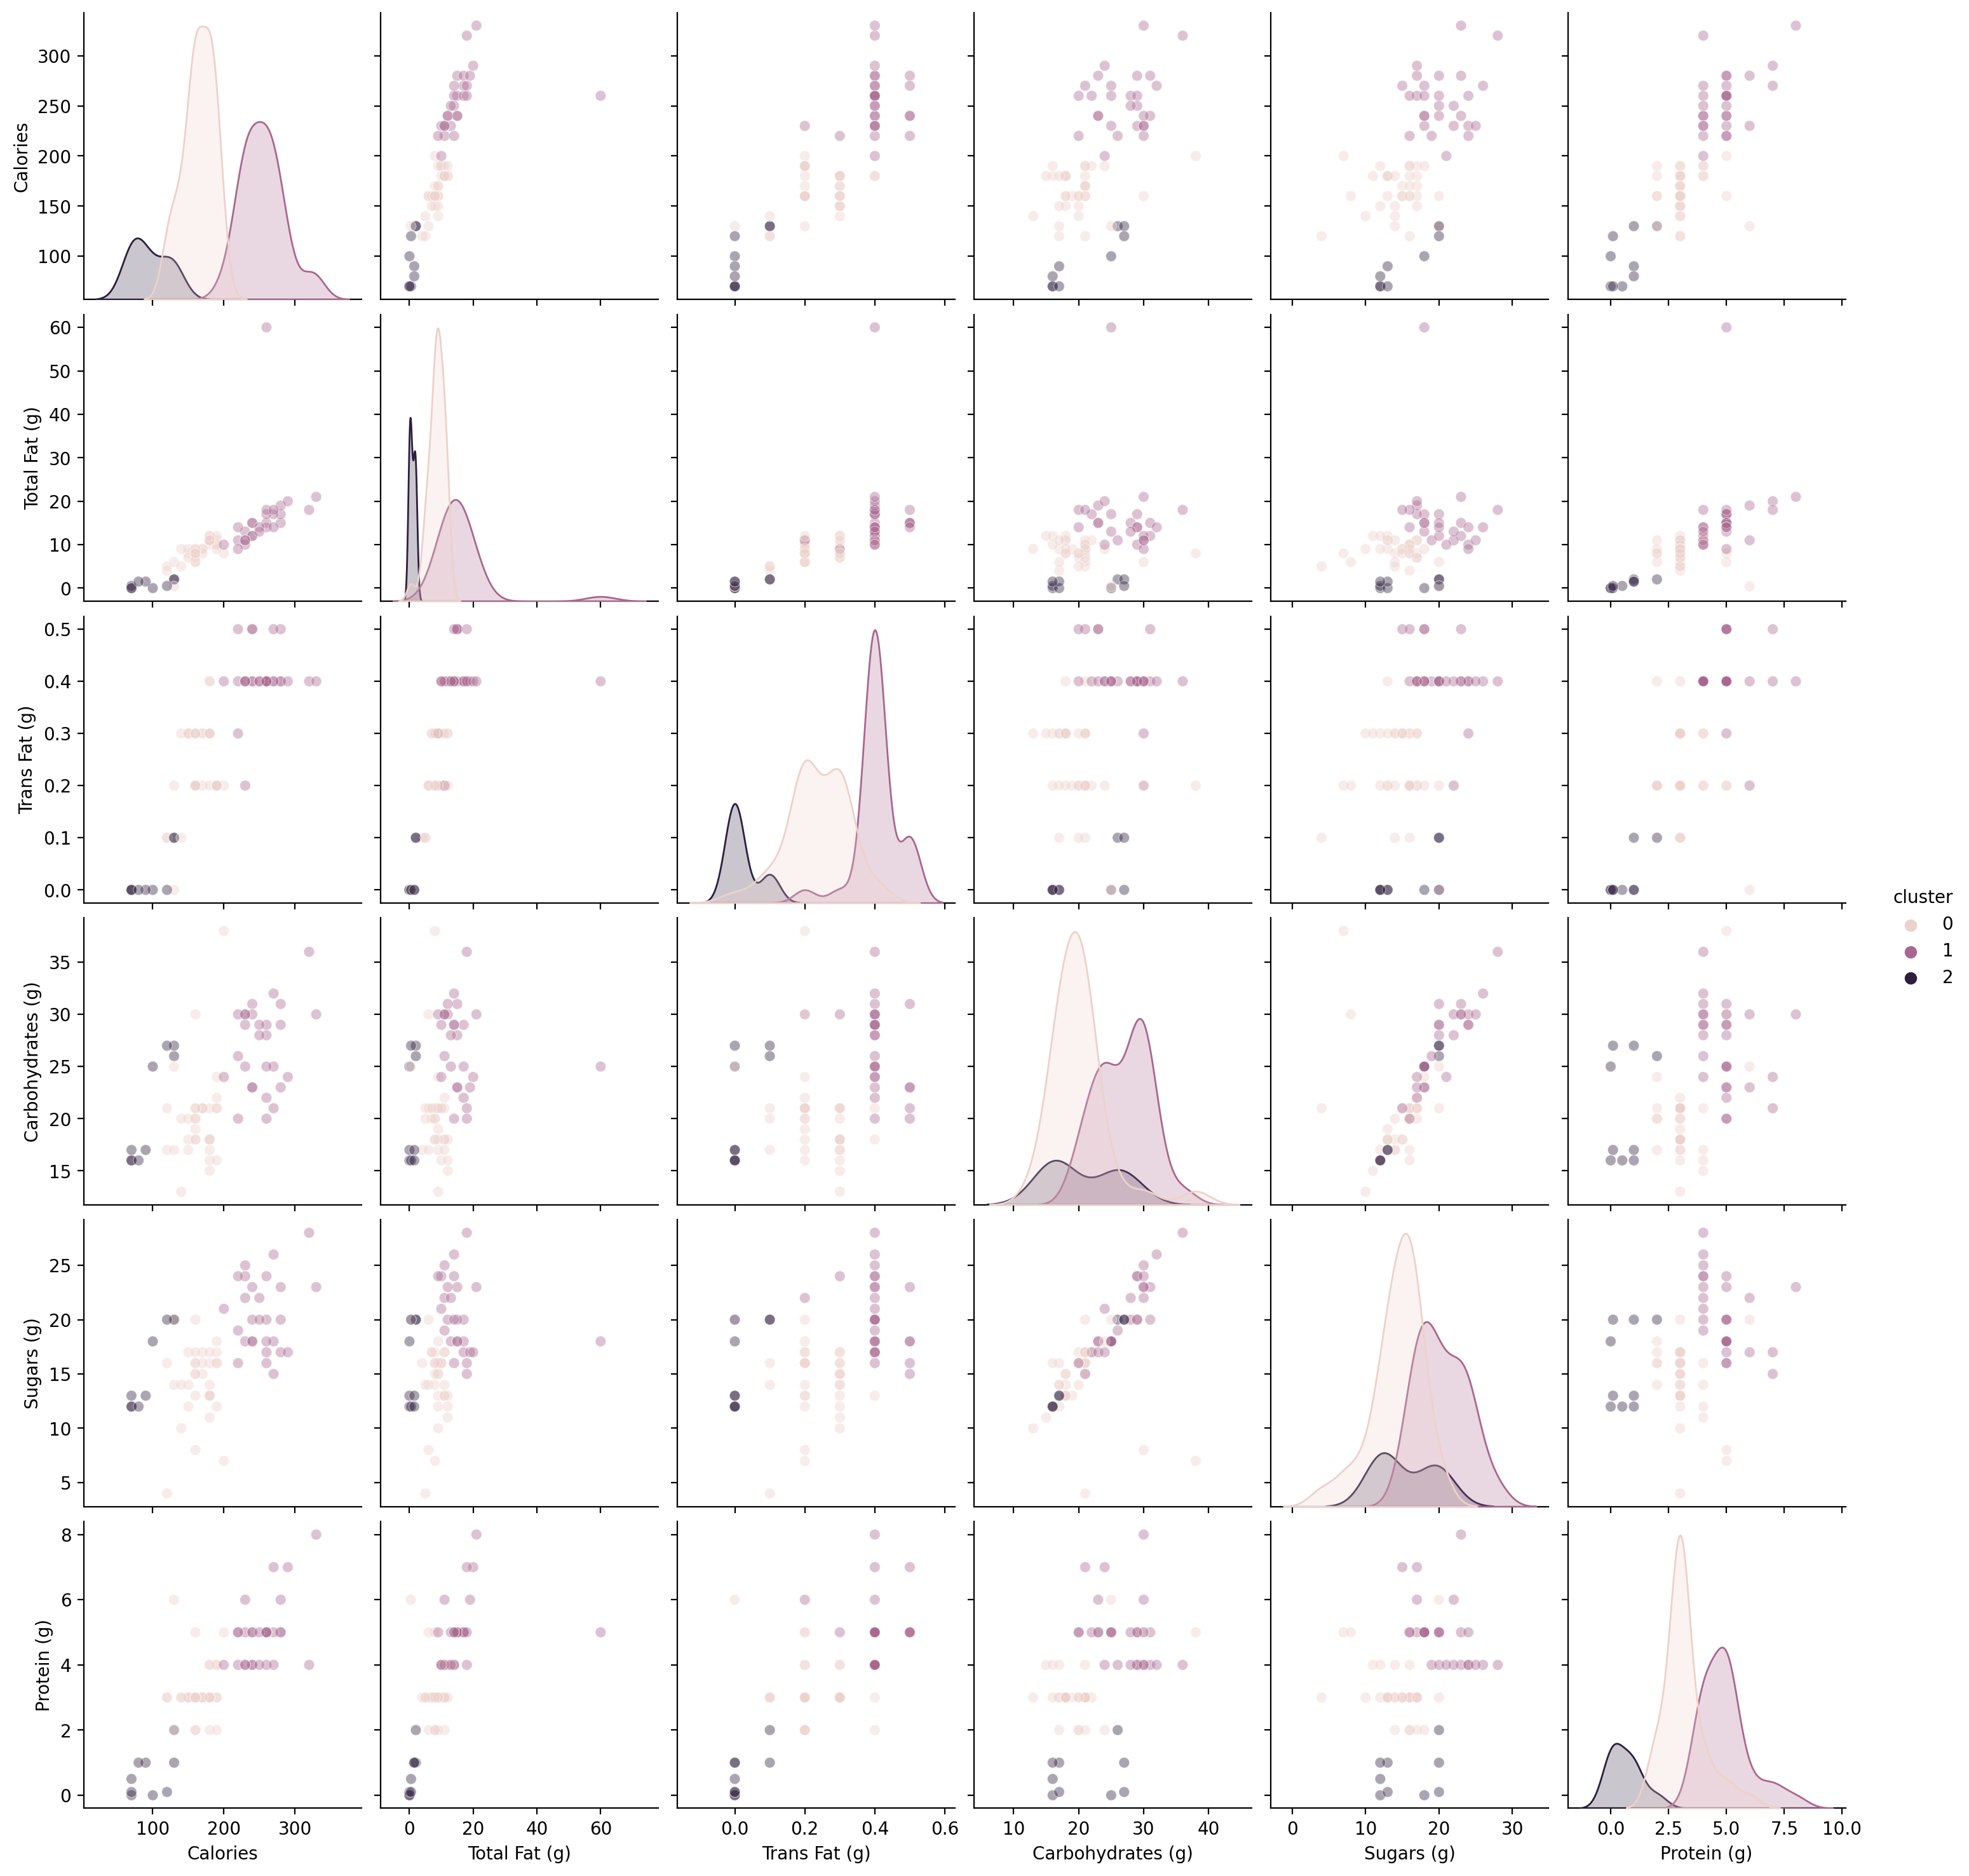

In [37]:
sns.pairplot(df, vars = cols, hue = 'cluster', plot_kws = {'alpha': .4});

### PCA

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [33]:
df.head(3)

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0


In [34]:
X = df[cols]
X.head(3)

,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g)
0,160,8.0,0.2,20,16,2.0
1,160,9.0,0.2,19,13,3.0
2,170,9.0,0.3,21,15,3.0


In [35]:
scaler = StandardScaler()
scaler

StandardScaler()

In [36]:
X_t = scaler.fit_transform(X)
X_t

array([[-0.51819396, -0.32481093, -0.53353016, -0.53584393, -0.20477091,
        -0.9400199 ],
       [-0.51819396, -0.19807311, -0.53353016, -0.72061769, -0.87667545,
        -0.34018952],
       [-0.35479947, -0.19807311,  0.15808301, -0.35107016, -0.42873909,
        -0.34018952],
       [-1.17177192, -0.83176221, -1.22514333, -1.09016523, -0.20477091,
        -0.34018952],
       [-1.00837743, -1.08523785, -1.22514333,  0.57279868,  0.69110182,
        -0.9400199 ],
       [-0.68158845, -0.32481093,  0.15808301, -0.90539146, -0.65270727,
        -0.34018952],
       [-1.17177192, -0.70502439, -1.22514333, -0.35107016, -2.89238908,
        -0.34018952],
       [-0.35479947, -0.32481093, -0.53353016, -0.35107016,  0.01919727,
        -0.34018952],
       [ 0.13538401, -0.32481093, -0.53353016,  2.79008389, -2.22048454,
         0.85947125],
       [ 0.46217299,  0.05540253,  0.84969618,  0.57279868,  0.46713363,
         0.25964087],
       [-0.02801048,  0.05540253, -0.53353016, -0.

In [38]:
X_t[:5].round(4)

array([[-0.5182, -0.3248, -0.5335, -0.5358, -0.2048, -0.94  ],
       [-0.5182, -0.1981, -0.5335, -0.7206, -0.8767, -0.3402],
       [-0.3548, -0.1981,  0.1581, -0.3511, -0.4287, -0.3402],
       [-1.1718, -0.8318, -1.2251, -1.0902, -0.2048, -0.3402],
       [-1.0084, -1.0852, -1.2251,  0.5728,  0.6911, -0.94  ]])

In [39]:
def scree_plot(X, n_components, with_cumulative = False, show_data_label = False, figsize = (10, 7)):
    '''
    PCA scree plot with cumulative
    '''
    scaler = StandardScaler()
    X_t = scaler.fit_transform(X)

    max_components = min(X.shape)
    x = np.arange(1, n_components + 1)
    pca = PCA(n_components = max_components)
    pca.fit_transform(X_t)
    y1 = pca.explained_variance_ratio_[:n_components]
    y2 = np.cumsum(pca.explained_variance_ratio_)[:n_components]
    
    plt.figure(figsize = figsize)
    
    if n_components > 20:
        marker = None
    else:
        marker = 'o'

    if with_cumulative:
        plt.plot(x, y2, linestyle = '--', marker = marker, label = 'cumulative', color = 'salmon')
        
    plt.plot(x, y1, linestyle = '-', marker = marker, label = 'individual', color = 'deepskyblue')
    plt.title('explained variance ratio')
    plt.xlabel('# of components')
    plt.ylabel('proportion of variance explained')
    plt.legend()

    if with_cumulative:
        [plt.axhline(y = xl, color = '.7', linestyle = '--') for xl in [.8, .9, .95, 1]]
    plt.grid(axis = 'x')

    if show_data_label:
        for n, v, cv in zip(np.nditer(x, flags = ['refs_ok']), 
                            np.nditer(y1, flags = ['refs_ok']),
                            np.nditer(y2, flags = ['refs_ok'])):
                plt.text(n + .02, v + .02, f'{v * 100:.2f}%', fontsize = 10)
                if with_cumulative:
                    plt.text(n + .02, cv + .02, f'{cv * 100:.2f}%', fontsize = 10)

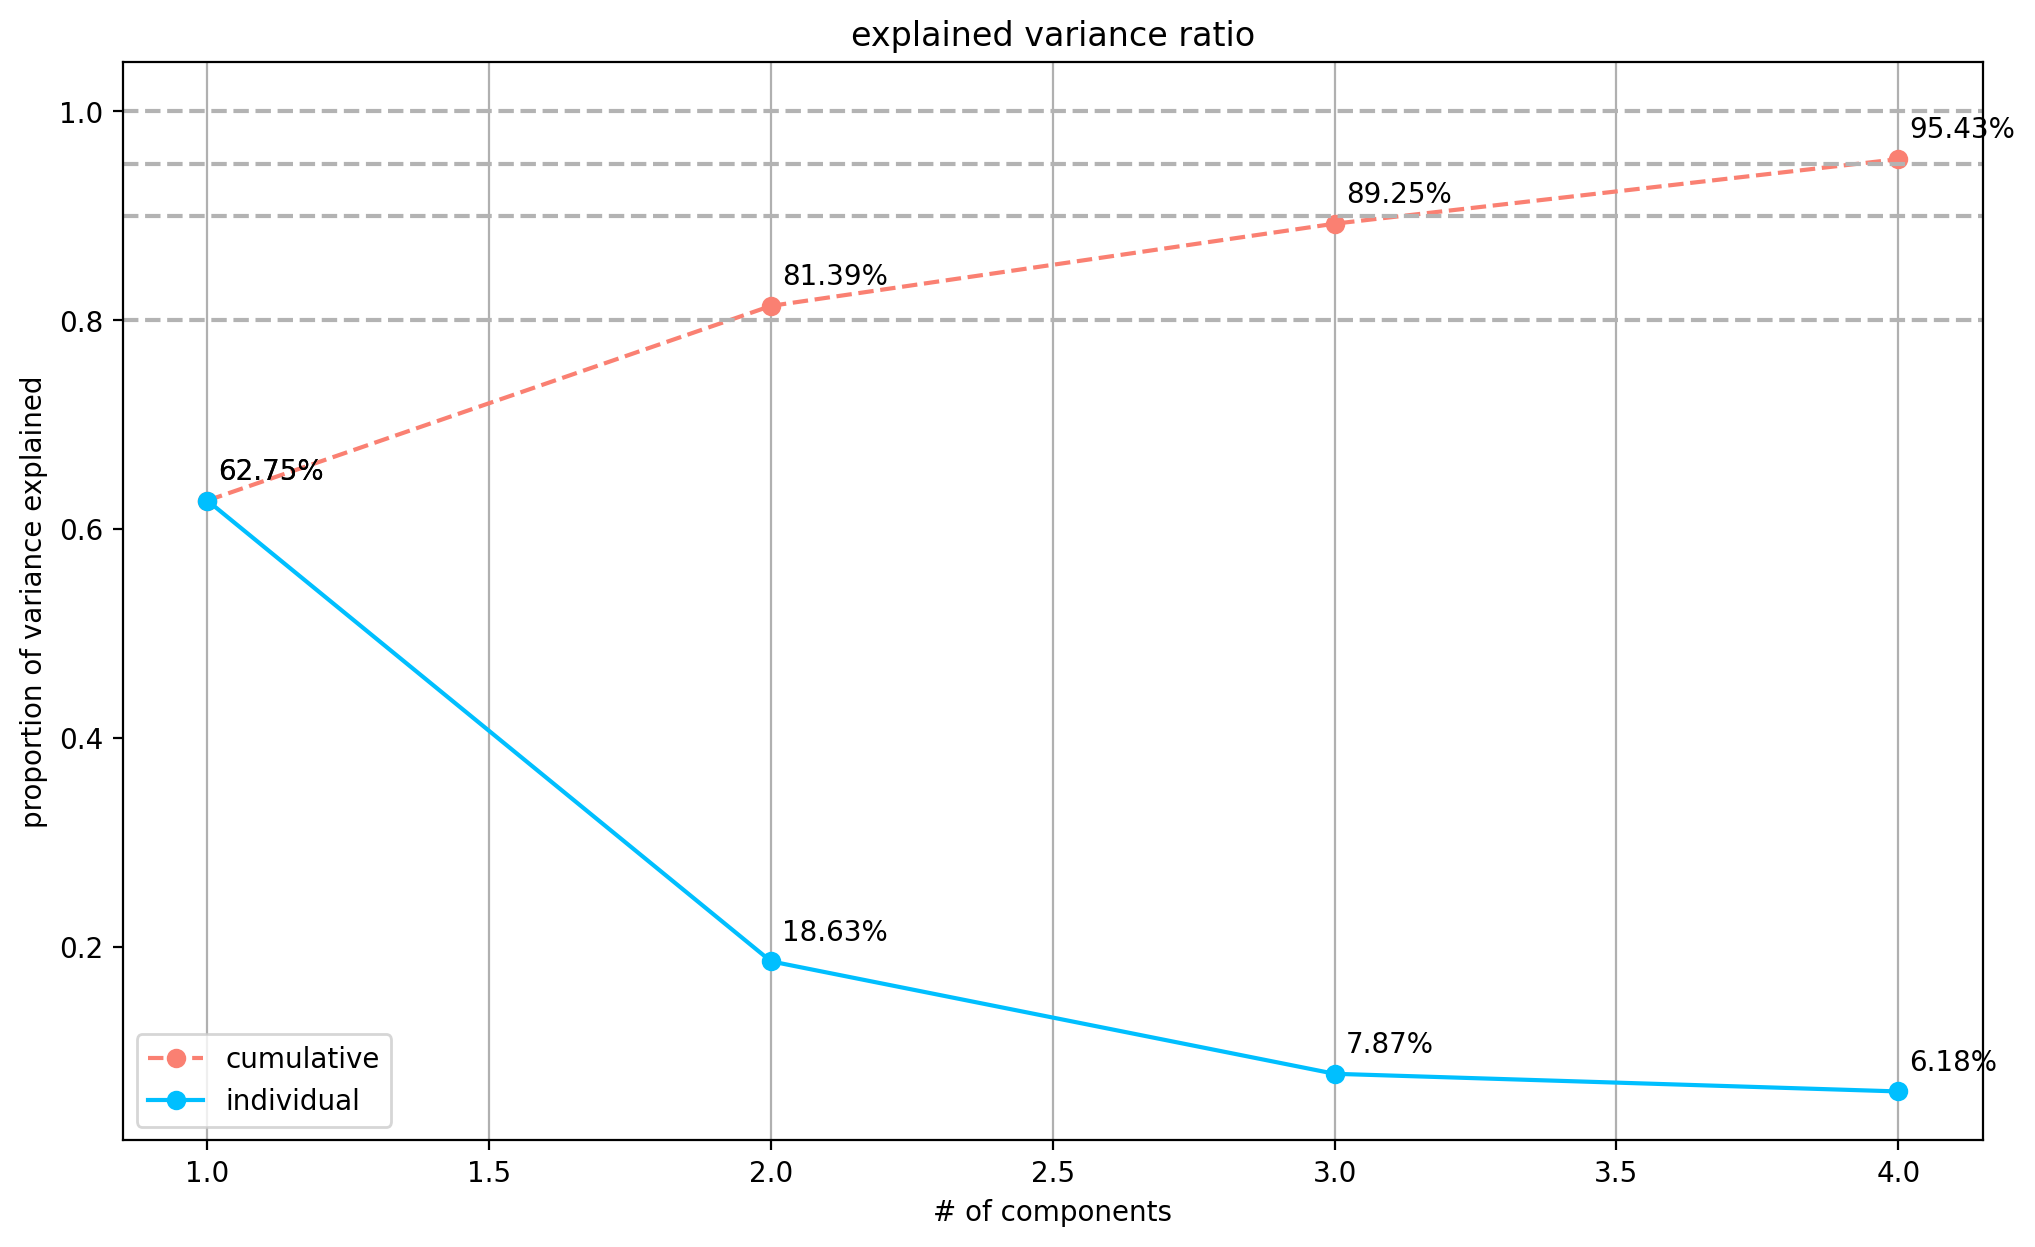

In [40]:
scree_plot(X, 4, True, True, figsize=(12, 7))

In [41]:
pca = PCA(n_components=X.shape[1])
pca

PCA(n_components=6)

In [42]:
pca = PCA(n_components=3)

pca.fit_transform(X_t)
print(f'explained_variance (n_components = {pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components = {pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components = 3) = [3.81959142 1.13428279 0.47899446]
explained_variance_ratio (n_components = 3) = [0.62750431 0.18634646 0.07869195]
sum explained_variance_ratio = 0.8925427102383179


In [43]:
pca.components_.round(4) # Eigenvectors

array([[-0.5028, -0.3847, -0.4397, -0.3386, -0.3263, -0.4299],
       [ 0.0436,  0.4067,  0.2583, -0.5848, -0.605 ,  0.2407],
       [ 0.0303, -0.3411, -0.2392,  0.4553, -0.5433,  0.5683]])

In [44]:
cols

['Calories',
 'Total Fat (g)',
 'Trans Fat (g)',
 'Carbohydrates (g)',
 'Sugars (g)',
 'Protein (g)']

In [45]:
# put pca to a dataframe

dpc = pd.DataFrame(pca.components_.T, 
                  index = cols,
                  columns = [f'PC{n+1}' for n in range(pca.n_components)]).round(4) #Eigenvectors
dpc

,PC1,PC2,PC3
Calories,-0.5028,0.0436,0.0303
Total Fat (g),-0.3847,0.4067,-0.3411
Trans Fat (g),-0.4397,0.2583,-0.2392
Carbohydrates (g),-0.3386,-0.5848,0.4553
Sugars (g),-0.3263,-0.6050,-0.5433
Protein (g),-0.4299,0.2407,0.5683


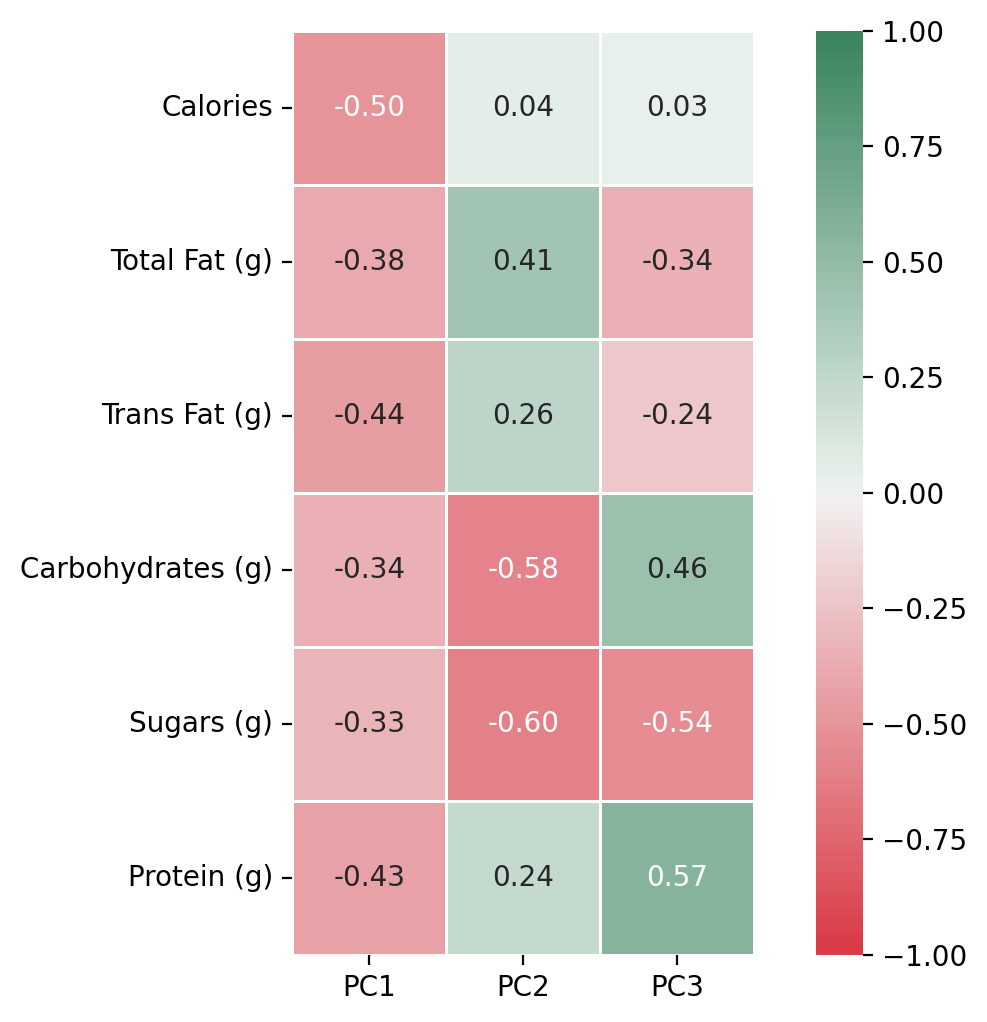

In [46]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.heatmap(dpc, cmap = sns.diverging_palette(10, 145, n = 100), linewidths = 1, 
            center = 0, annot = True, fmt = '.2f', vmin = -1, vmax = 1, square = True, ax = ax);

In [47]:
X_pca = pca.transform(X_t)[:5] # get reduced dimensions
X_pca

array([[ 1.27240098, -0.08152447, -0.44421778],
       [ 1.24760651,  0.6289527 ,  0.13436957],
       [ 0.59008376,  0.32761531, -0.10120799],
       [ 2.02998357, -0.02624934, -0.03718873],
       [ 1.44777299, -1.78114568, -0.01620903]])

In [48]:
pca.components_.T # new reduced dimensions

array([[-0.50276537,  0.0435505 ,  0.03027479],
       [-0.38473261,  0.4067255 , -0.34112831],
       [-0.43967032,  0.25831283, -0.23916284],
       [-0.33861501, -0.5848346 ,  0.45534023],
       [-0.32629083, -0.60495574, -0.54334945],
       [-0.42985112,  0.2407265 ,  0.56828927]])

In [49]:
X_t.shape

(70, 6)

In [50]:
pca.components_.shape

(3, 6)

In [51]:
np.dot(X_t, pca.components_.T)[:5] # pca.transform(X)

array([[ 1.27240098, -0.08152447, -0.44421778],
       [ 1.24760651,  0.6289527 ,  0.13436957],
       [ 0.59008376,  0.32761531, -0.10120799],
       [ 2.02998357, -0.02624934, -0.03718873],
       [ 1.44777299, -1.78114568, -0.01620903]])

In [52]:
df.head()

,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2


In [53]:
dd = pd.concat([df, pd.DataFrame(pca.transform(X), 
                           columns = [f'PC{n}' for n in range(1, pca.n_components_ + 1)]), 
              ], axis = 'columns')
dd.head()

/opt/homebrew/Caskroom/miniforge/base/envs/conda_env/lib/python3.9/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


,Flavour,Calories,Total Fat (g),Trans Fat (g),Carbohydrates (g),Sugars (g),Protein (g),cluster,PC1,PC2,PC3
0,Bananas Foster,160,8.0,0.2,20,16,2.0,0,-96.460909,-10.620984,3.616899
1,Baseball Nut,160,9.0,0.2,19,13,3.0,0,-95.958005,-7.573830,5.018768
2,Beavertails Pastry,170,9.0,0.3,21,15,3.0,0,-102.359438,-9.492075,5.121581
3,Blackberry Frozen Yogurt,120,4.0,0.1,17,16,3.0,0,-74.181403,-12.020507,2.996606
4,Blue Raspberry Sherbet,130,2.0,0.1,26,20,2.0,2,-82.362439,-20.322514,5.337985


In [54]:
dd.cluster.unique().shape[0]

3

<AxesSubplot: xlabel='PC1', ylabel='PC2'>

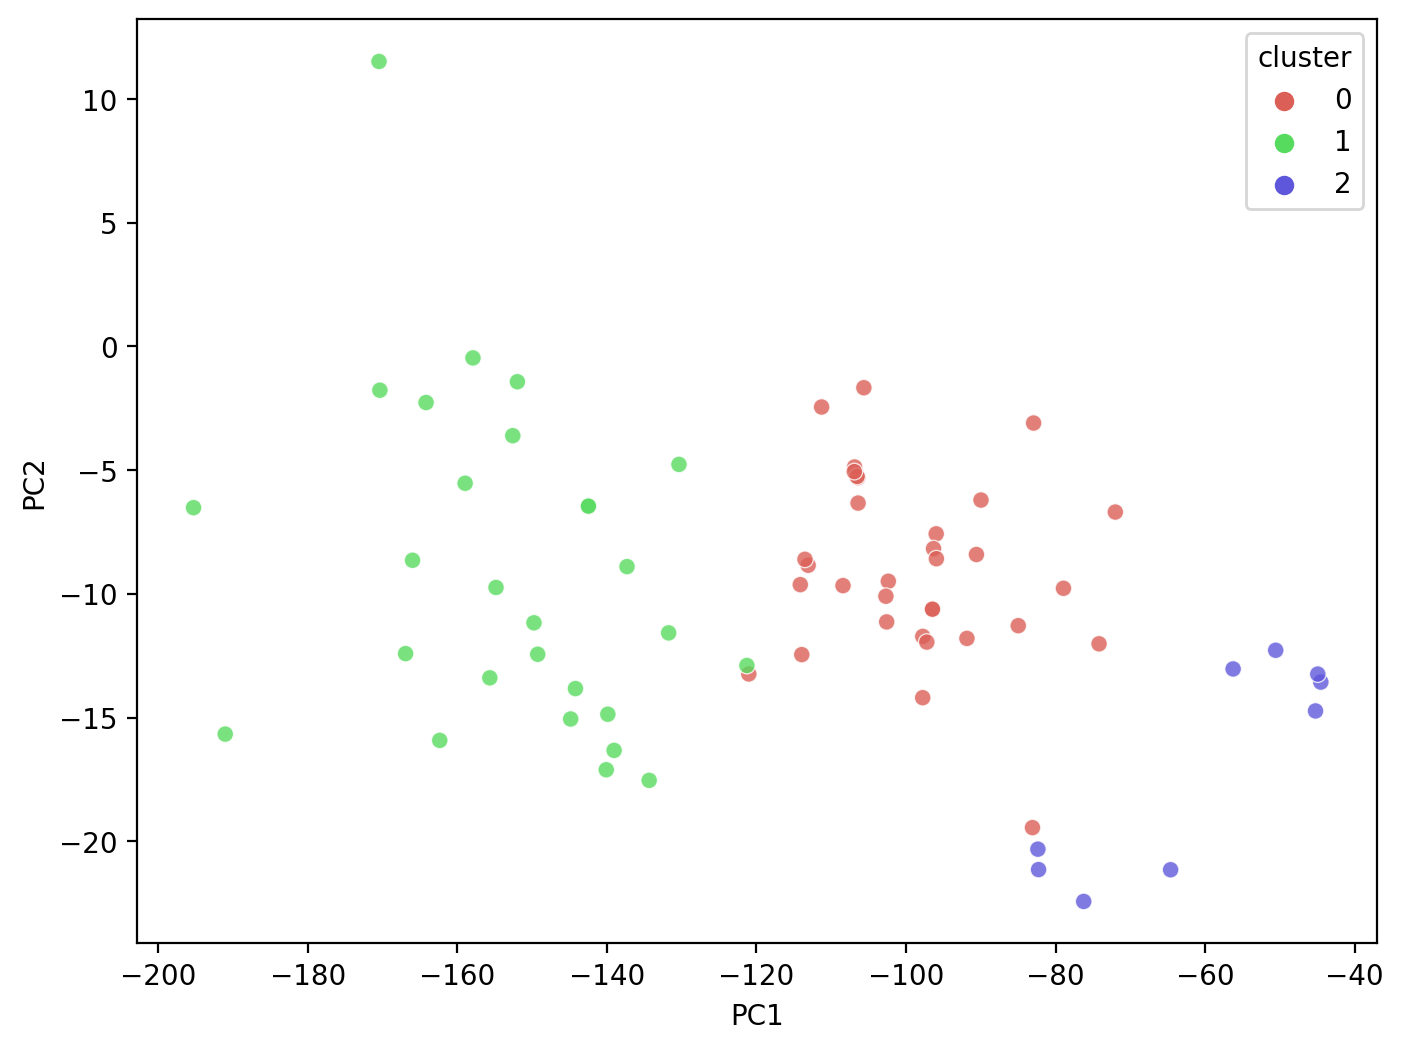

In [55]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.scatterplot(data = dd, x = 'PC1', y = 'PC2', hue = 'cluster', 
                alpha = .8, palette = sns.color_palette("hls", df.cluster.unique().shape[0]), ax = ax)

### biplot using yellowbrick package

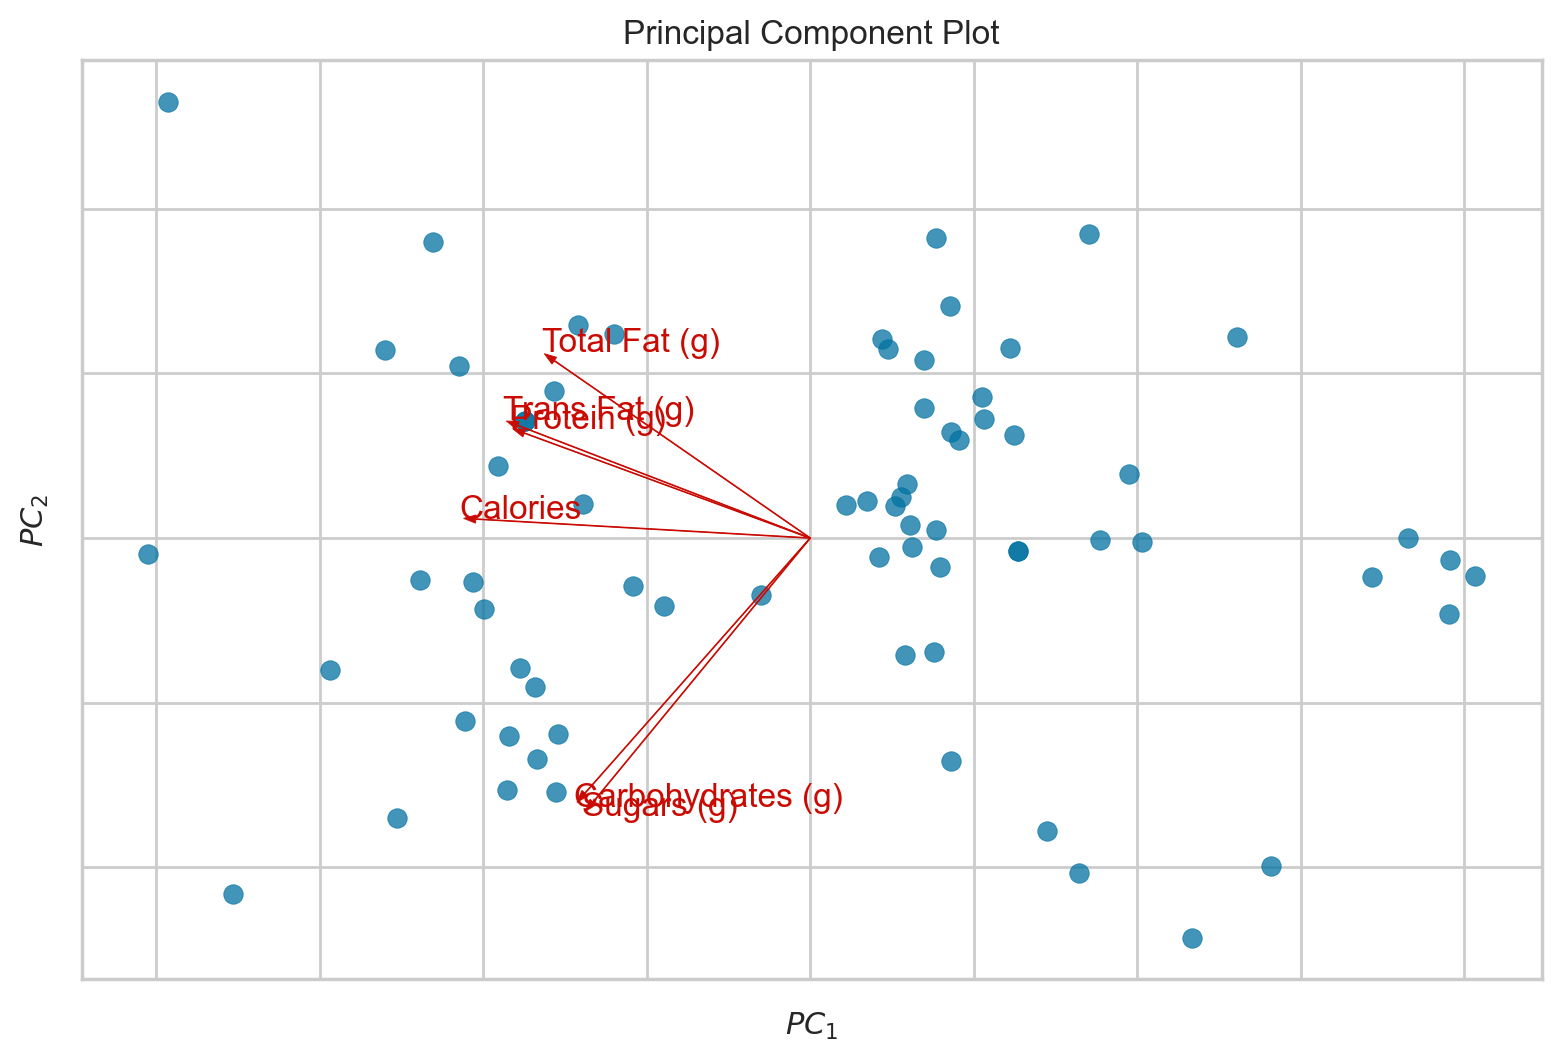

<AxesSubplot: title={'center': 'Principal Component Plot'}, xlabel='$PC_1$', ylabel='$PC_2$'>

In [56]:
# pip install yellowbrick

import yellowbrick.features as yb
visualizer = yb.PCA(scale = True, proj_features = True, proj_dim = 2)
visualizer.fit_transform(X)
visualizer.show()

### Plot 3 components

In [57]:
# This import registers the 3D projection, but is otherwise unused.

from mpl_toolkits.mplot3d import Axes3D

In [58]:
# pca = PCA(n_components=X.shape[1])

pca = PCA(n_components = 3)

X_pca = pca.fit_transform(X)
print(f'explained_variance (n_components = {pca.n_components}) = {pca.explained_variance_}')
print(f'explained_variance_ratio (n_components = {pca.n_components}) = {pca.explained_variance_ratio_}')
print(f'sum explained_variance_ratio = {np.sum(pca.explained_variance_ratio_)}')

explained_variance (n_components = 3) = [3851.57952859   37.9262722    16.86334204]
explained_variance_ratio (n_components = 3) = [0.98358556 0.00968531 0.00430643]
sum explained_variance_ratio = 0.9975772900849742
